# Laboratorio 3

Diego Andrés Morales Aquino

## Parte 1: Rompiendo ECB en Imágenes

In [37]:
from PIL import Image
import matplotlib.pyplot as plt
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes
import numpy as np
import os

In [38]:
def encrypt_image_aes(img_path, mode="ECB"):
    # Cargar imagen y convertir a RGB
    img = Image.open(img_path).convert("RGB")
    img_array = np.array(img)
    img_bytes = img_array.tobytes()
    
    # Generar key
    key = get_random_bytes(16)
    
    if mode == "CBC":
        iv = get_random_bytes(16)  # Generar vecotr de inicialización
        cipher = AES.new(key, AES.MODE_CBC, iv)
    else:
        cipher = AES.new(key, AES.MODE_ECB)
        iv = None  # No se usa vector de inicialización en ECB
    
    # Añadir padding y cifrar
    padded_bytes = pad(img_bytes, AES.block_size)
    encrypted_bytes = cipher.encrypt(padded_bytes)
    
    # Guardar como imagen
    encrypted_array = np.frombuffer(encrypted_bytes, dtype=np.uint8)
    encrypted_array = encrypted_array[:img_array.size].reshape(img_array.shape)  
    encrypted_img = Image.fromarray(encrypted_array)
    
    output_file = f"gen/encrypted_{mode}_{os.path.basename(img_path)}"
    encrypted_img.save(output_file)
    
    return key, iv, img.size, output_file

### Ejemplo de cifrado de imágen 1

In [39]:
image_path = 'tux.ppm'

Imagen tux.ppm original


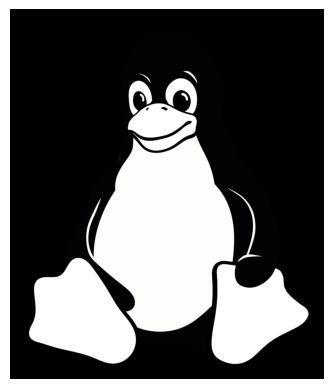

In [40]:
# Imagen original
image = Image.open(image_path)

print(f"Imagen {image_path} original")

plt.imshow(image)
plt.axis('off') 
plt.show()

Imagen tux.ppm cifrada con AES en modo ECB


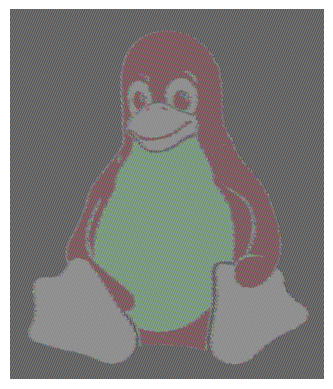

In [41]:
_, _, _, encrypted_file = encrypt_image_aes(image_path, mode="ECB")
encrypted_image = Image.open(encrypted_file)

print(f"Imagen {image_path} cifrada con AES en modo ECB")

# Mostrar la imagen cifrada
plt.imshow(encrypted_image)
plt.axis('off')
plt.show()

Imagen tux.ppm cifrada con AES en modo CBC


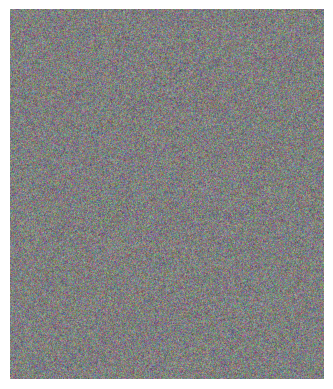

In [42]:
_, _, _, encrypted_file = encrypt_image_aes(image_path  , mode="CBC")
encrypted_image = Image.open(encrypted_file)

print(f"Imagen {image_path} cifrada con AES en modo CBC")

# Mostrar la imagen cifrada
plt.imshow(encrypted_image)
plt.axis('off')
plt.show()

### Ejemplo imagen 2

In [43]:
image_path = 'snoopy.ppm'

Imagen snoopy.ppm original


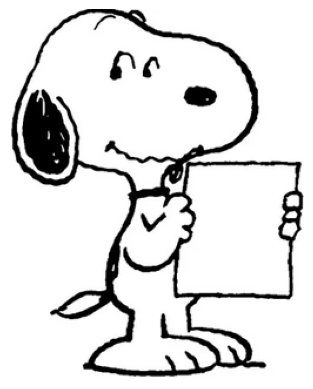

In [44]:
# Imagen original
image = Image.open(image_path)

print(f"Imagen {image_path} original")

plt.imshow(image)
plt.axis('off') 
plt.show()

Imagen snoopy.ppm cifrada con AES en modo ECB


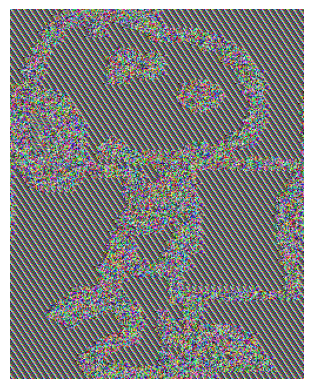

In [45]:
_, _, _, encrypted_file = encrypt_image_aes(image_path, mode="ECB")
encrypted_image = Image.open(encrypted_file)

print(f"Imagen {image_path} cifrada con AES en modo ECB")

# Mostrar la imagen cifrada
plt.imshow(encrypted_image)
plt.axis('off')
plt.show()

Imagen snoopy.ppm cifrada con AES en modo CBC


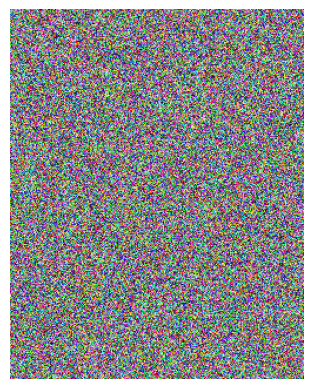

In [46]:
_, _, _, encrypted_file = encrypt_image_aes(image_path, mode="CBC")
encrypted_image = Image.open(encrypted_file)

print(f"Imagen {image_path} cifrada con AES en modo CBC")

# Mostrar la imagen cifrada
plt.imshow(encrypted_image)
plt.axis('off')
plt.show()

- **¿Por qué el cifrado ECB revela los patrones de la imagen?** <br>
El cifrado en modo ECB cifra cada bloque de datos de forma independiente utilizando una misma clave, por lo que, si se cuenta con dos bloques idénticos de datos el resultado cifrado también será el mismo. En el caso de imágenes, especialmente al tratarse de imágenes con baja complejidad, pueden existir regiones con pixeles idénticos, los cuales al cifrarse de la misma forma preservan los patrones de la imagen original. Tal y como se observa en ambas imágenes, los contornos y estructuras siguen siendo visibles.


* **¿Cómo cambia la apariencia con CBC?**<br>
A diferencia de ECB, el modo CBC cifra cada bloque de datos dependiendo no solo del bloque de datos actual, sino también del bloque cifrado anterior. Además, para el primer bloque, se utiliza un vector de inicialización random, lo cual introduce aleatoriedad en el cifrado. Como resultado, aunque se cuente con bloques de datos idénticos en diferentes regiones de la imagen, el resultado al cifrarlo será distinto, pues depende de la secuencia de bloques cifrados anteriores. Por lo que, tal y como se observa en ambas imágenes, se difuminan estos patrones, haciendo que la imagen original sea aparentemente irreconocible.

- **¿Qué tan seguro es usar ECB para cifrar datos estructurados?**<br>
El modo ECB no es recomendado para datos estructurados que pueden contener redundancia, pues permite que los patrones del contenido original sigan siendo visibles para el contenido cifrado, lo que facilita en gran medida ataques criptográficos.